# Business Analytics - January -  Major Project

Problem statement: Create a classification model to predict whether a person makes over $50k a
year

### Importing the Data 

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


income = pd.read_csv('adult (1).csv',names = ['age', 'workclass', 'fnlwgt', 
           'education', 'education-num', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 
           'predclass'], na_values=[" ?"])

income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  predclass       32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
income.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
income.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
predclass            0
dtype: int64

### Dropping NA values

In [5]:
income_df = income.dropna()
income_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Converting Target column into 0 and 1

In [6]:
income_df['predclass'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [7]:
income_df.loc[income_df['predclass'] == ' <=50K', 'predclass' ] = 0
income_df.loc[income_df['predclass'] == ' >50K', 'predclass'] = 1

income_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [8]:
income_df['predclass'].unique()

array([0, 1], dtype=object)

### Basic Visualisations

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='predclass'>

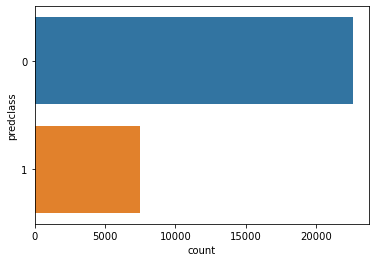

In [10]:
sns.countplot(y='predclass', data=income_df)

Here, we can see that there are approximately 3 times as many people who do earn <=50k$

<AxesSubplot:xlabel='age', ylabel='Count'>

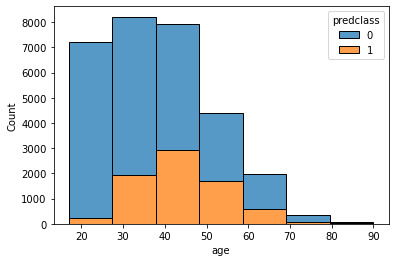

In [11]:
sns.histplot(x='age', data=income_df, hue='predclass', bins=7, multiple='stack')

<AxesSubplot:xlabel='Count', ylabel='workclass'>

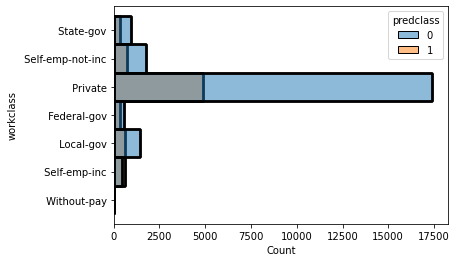

In [12]:
sns.histplot(y='workclass', data=income_df, hue='predclass', multiple='stack')

<AxesSubplot:xlabel='Count', ylabel='education'>

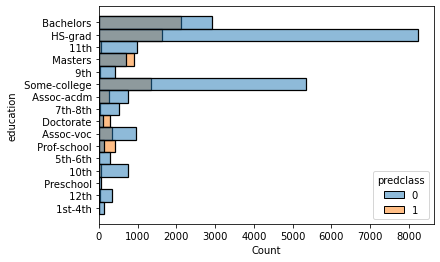

In [13]:
sns.histplot(y='education', data=income_df, hue='predclass', multiple='stack')

<AxesSubplot:xlabel='Count', ylabel='marital-status'>

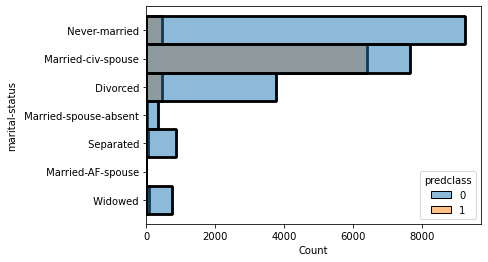

In [14]:
sns.histplot(y='marital-status', data=income_df, hue='predclass', multiple='stack')

<AxesSubplot:xlabel='sex', ylabel='Count'>

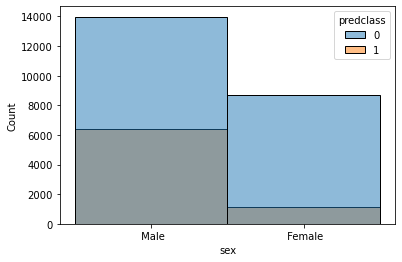

In [15]:
sns.histplot(x='sex', data=income_df, hue='predclass', multiple='stack')

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

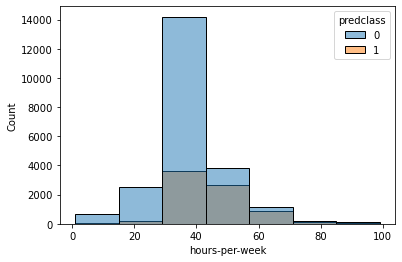

In [16]:
sns.histplot(x='hours-per-week', data=income_df, hue='predclass', bins=7, multiple='stack')

<AxesSubplot:xlabel='Count', ylabel='race'>

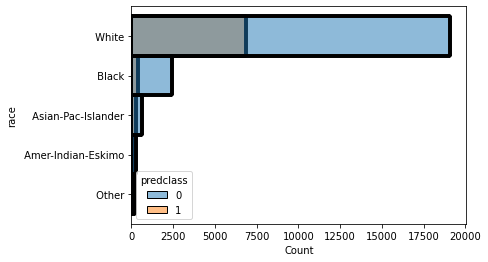

In [17]:
sns.histplot(y='race', data=income_df, hue='predclass', multiple='stack')

### Label Encoding

Using Label Encoder to convert values in columns containing textual categories into numerical values.

In [18]:
from sklearn.preprocessing import LabelEncoder
columns_list = ['workclass','education','marital-status','occupation','relationship' ,'race','sex','native-country']

lb = LabelEncoder()
for i in columns_list:
    income_df[i] = lb.fit_transform(income_df[i])

income_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


### Getting data values in x and target variable in y

In [19]:
x = income_df.drop(['education','native-country', 'predclass'],axis=1)
x

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,39,5,77516,13,4,0,1,4,1,2174,0,40
1,50,4,83311,13,2,3,0,4,1,0,0,13
2,38,2,215646,9,0,5,1,4,1,0,0,40
3,53,2,234721,7,2,5,0,2,1,0,0,40
4,28,2,338409,13,2,9,5,2,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,12,2,12,5,4,0,0,0,38
32557,40,2,154374,9,2,6,0,4,1,0,0,40
32558,58,2,151910,9,6,0,4,4,0,0,0,40
32559,22,2,201490,9,4,0,3,4,1,0,0,20


In [20]:
y=income_df['predclass']
y=pd.array(y)
y = y.astype('int')
type(y)

numpy.ndarray

### Scaling the Data using MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

x = pd.DataFrame(minmax.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.301370,0.833333,0.043338,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959
1,0.452055,0.666667,0.047277,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449
2,0.287671,0.333333,0.137244,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959
3,0.493151,0.333333,0.150212,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959
4,0.150685,0.333333,0.220703,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959
...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.136986,0.333333,0.165563,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551
30158,0.315068,0.333333,0.095589,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959
30159,0.561644,0.333333,0.093914,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959
30160,0.068493,0.333333,0.127620,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878


### Applying PCA to reduce number of Dimensions

In [22]:
from sklearn.decomposition import PCA

x_pca = PCA(n_components=0.95)
x_pca.fit(x)
pca_df = pd.DataFrame(x_pca.transform(x))
pca_df

,0,1,2,3,4,5,6,7
0,-0.290747,-0.436989,0.229955,-0.143222,-0.108898,-0.300114,0.330055,-0.279266
1,-0.416730,-0.246859,-0.132352,-0.075610,-0.048394,-0.159549,0.237211,-0.138046
2,-0.358678,-0.132727,-0.221883,0.303784,-0.056667,0.090568,-0.116292,-0.033710
3,-0.405363,-0.115602,-0.056459,0.002363,0.474833,0.220818,0.070871,0.033217
4,0.930465,0.292697,0.058480,0.385743,0.318569,-0.240918,-0.070834,-0.010601
...,...,...,...,...,...,...,...,...
30157,0.894271,0.510577,-0.005357,0.362304,-0.174128,-0.131017,-0.066105,0.004527
30158,-0.427186,-0.033017,-0.080667,-0.039172,-0.040078,0.106431,-0.055934,0.000477
30159,0.895008,-0.377314,0.332864,-0.230629,-0.116903,0.040003,0.378918,0.260135
30160,-0.055886,-0.435963,0.551757,0.165005,-0.155956,0.003096,-0.043861,-0.000873


### Splitting the Data into Training and Testing Data

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pca_df,y,test_size=0.25)

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(22621, 8)
(22621,)
(7541, 8)
(7541,)


## Implementing Machine Learning Models

### Importing necessary Libraries

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

### Creating a function to simplify the process

In [26]:
def model(mod,x_train, x_test, y_train, y_test):
    
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    cm = confusion_matrix(y_test,pred)
    print(cm)
    print(classification_report(y_test,pred))

### 1) Logistic Regression

In [27]:
m1 = LogisticRegression()
model(m1,x_train, x_test, y_train, y_test)

[[5280  359]
 [1125  777]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      5639
           1       0.68      0.41      0.51      1902

    accuracy                           0.80      7541
   macro avg       0.75      0.67      0.69      7541
weighted avg       0.79      0.80      0.78      7541



### 2) Gaussian Naive Bayes Classifier

In [28]:
m2 = GaussianNB()
model(m2,x_train, x_test, y_train, y_test)

[[4644  995]
 [ 628 1274]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      5639
           1       0.56      0.67      0.61      1902

    accuracy                           0.78      7541
   macro avg       0.72      0.75      0.73      7541
weighted avg       0.80      0.78      0.79      7541



### 3) Decision Tree

In [29]:
m3 = DecisionTreeClassifier(criterion = 'entropy')
model(m3,x_train, x_test, y_train, y_test)

[[4790  849]
 [ 854 1048]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5639
           1       0.55      0.55      0.55      1902

    accuracy                           0.77      7541
   macro avg       0.70      0.70      0.70      7541
weighted avg       0.77      0.77      0.77      7541



In [30]:
m4 = DecisionTreeClassifier(criterion='gini',max_depth=8, min_samples_split=20)
model(m4,x_train, x_test, y_train, y_test)

[[5161  478]
 [ 895 1007]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      5639
           1       0.68      0.53      0.59      1902

    accuracy                           0.82      7541
   macro avg       0.77      0.72      0.74      7541
weighted avg       0.81      0.82      0.81      7541



### 4) Random Forest

In [31]:
m5 = RandomForestClassifier(n_estimators=70, criterion='entropy', max_depth=8)
model(m5,x_train, x_test, y_train, y_test)

[[5287  352]
 [ 938  964]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5639
           1       0.73      0.51      0.60      1902

    accuracy                           0.83      7541
   macro avg       0.79      0.72      0.75      7541
weighted avg       0.82      0.83      0.82      7541



In [32]:
m6= RandomForestClassifier(n_estimators=70, criterion='gini', max_depth=8)
model(m6,x_train, x_test, y_train, y_test)

[[5258  381]
 [ 910  992]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      5639
           1       0.72      0.52      0.61      1902

    accuracy                           0.83      7541
   macro avg       0.79      0.73      0.75      7541
weighted avg       0.82      0.83      0.82      7541



### 5) KNN Classifier

For KNN Classifier, we need to find out the optimum number of neighbours for the model.<br>
To do this we create a 'for' loop and pass through values from 1 to 25, and compare the accuracy score and only consider the number with the best accuracy.

In [33]:
k_range = range(1,25)
acc = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    yk = knn.predict(x_test)
    acc.append(metrics.accuracy_score(y_test,yk))

acc

[0.7831852539451001,
 0.796843919904522,
 0.8046678159395305,
 0.8086460681607214,
 0.8114308447155549,
 0.8147460548998806,
 0.8183264818989524,
 0.8176634398620872,
 0.8205808248242938,
 0.8219069088980241,
 0.8213764752685321,
 0.821243866861159,
 0.8233656013791274,
 0.8249569022676038,
 0.8234982097865005,
 0.8253547274897228,
 0.8245590770454847,
 0.8242938602307386,
 0.8246916854528578,
 0.8234982097865005,
 0.8248242938602307,
 0.8253547274897228,
 0.8249569022676038,
 0.8268134199708261]

In this case the accuracy score is highest for number of neighbours = 23

In [34]:
m7 = KNeighborsClassifier(n_neighbors=23)
model(m7,x_train, x_test, y_train, y_test)

[[5109  530]
 [ 790 1112]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      5639
           1       0.68      0.58      0.63      1902

    accuracy                           0.82      7541
   macro avg       0.77      0.75      0.76      7541
weighted avg       0.82      0.82      0.82      7541



### 6) SVM (extra)

In [35]:
m8 = SVC(kernel='linear',C=1.0)
model(m8,x_train, x_test, y_train, y_test)

[[5304  335]
 [1133  769]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      5639
           1       0.70      0.40      0.51      1902

    accuracy                           0.81      7541
   macro avg       0.76      0.67      0.70      7541
weighted avg       0.79      0.81      0.79      7541



In [36]:
m9 = SVC(kernel='rbf', C=1.0, gamma=0.01)
model(m9,x_train, x_test, y_train, y_test)

[[5590   49]
 [1643  259]]
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      5639
           1       0.84      0.14      0.23      1902

    accuracy                           0.78      7541
   macro avg       0.81      0.56      0.55      7541
weighted avg       0.79      0.78      0.71      7541



In [37]:
m10 = SVC(kernel='poly', degree=2)
model(m10,x_train, x_test, y_train, y_test)

[[5516  123]
 [1564  338]]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      5639
           1       0.73      0.18      0.29      1902

    accuracy                           0.78      7541
   macro avg       0.76      0.58      0.58      7541
weighted avg       0.77      0.78      0.72      7541



<AxesSubplot:>

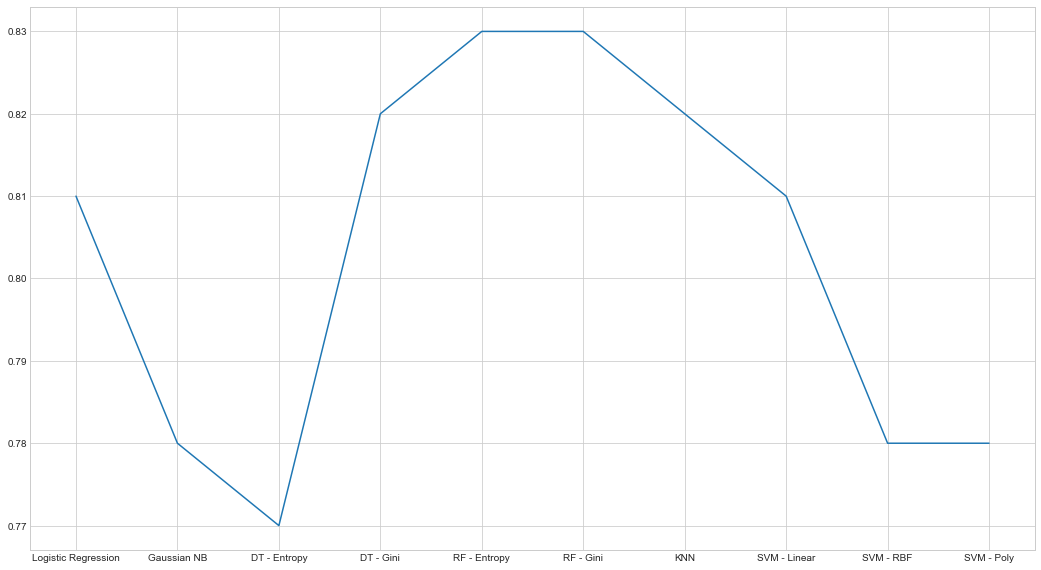

In [39]:
abc = ['Logistic Regression', 'Gaussian NB', 'DT - Entropy', 'DT - Gini', 'RF - Entropy',
       'RF - Gini','KNN','SVM - Linear','SVM - RBF','SVM - Poly']
accuracy = [0.81,0.78,0.77,0.82,0.83,0.83,0.82,0.81,0.78,0.78]

fig = plt.figure(figsize=(18,10))
plt.style.use('seaborn-whitegrid')
sns.lineplot(x=abc,y=accuracy)


Here, we can see that Random Forest model gives us the best accuracy of 83%.

#### Made By-
Full Name - Vinay Surpur <br>
Email ID - surpurvinay@gmail.com<br>
Mobile no. - 8600062554<br>
Course - Business Analytics<br>